In [1]:
import numpy as np
import pandas as pd

from utils import *
from constants import *
from models import *

## Display Results

## Display Results

In [2]:
results = pd.read_csv('results.csv')

# Print results
for idx, row in results.iterrows():
    print("Model:", row['Model Name'])
    for metric, value in row.items():
        if metric != 'Model Name':
            print(f"{metric:50} {value if isinstance(value, str) else round(value, 2)}")
    print("\n")

Model: Non-probabilistic MLP
Train RMSE                                         27.27
Train MAE                                          16.32
Test RMSE                                          27.85
Test MAE                                           16.59
Test % within 95.00% CI                            96.24
Test % within 99.00% CI                            93.21


Model: Epistemic Uncertainty BNN (Flipout) - 1.0% Sample
Train RMSE                                         124.99
Train MAE                                          92.54
Test RMSE                                          124.93
Test MAE                                           92.37
Test % within 95.00% CI                            17.17
Test % within 99.00% CI                            13.27


Model: Epistemic Uncertainty BNN (Flipout)
Train RMSE                                         29.38
Train MAE                                          18.11
Test RMSE                                          29.75
Test MAE  

In [3]:
# Format results to be added to a latex table.

results = pd.read_csv('results.csv')

metrics = results.columns[1:]

for idx, row in results.iterrows():
    formatted_line = ""
    for i, metric in enumerate(metrics):
        value = row[metric]
        # Try converting string values to floats
        try:
            value = float(value)
        except ValueError:
            pass 
        # Format the value to two decimal places
        formatted_value = "{:.2f}".format(value) if isinstance(value, float) else value
        if i == len(metrics) - 1:
            formatted_value += "\%" 
        
        formatted_line += f" & {formatted_value}"
        if i == 0:
            formatted_line = str(row['Model Name']) + " " + formatted_value
    print(formatted_line + " \\\\")
    print("\n")

Non-probabilistic MLP 27.27 & 16.32 & 27.85 & 16.59 & 96.24 & 93.21\% \\


Epistemic Uncertainty BNN (Flipout) - 1.0% Sample 124.99 & 92.54 & 124.93 & 92.37 & 17.17 & 13.27\% \\


Epistemic Uncertainty BNN (Flipout) 29.38 & 18.11 & 29.75 & 18.28 & 25.64 & 19.66\% \\


Probabilistic MLP (Separate Sub-models) 28.28 & 15.16 & 29.10 & 15.42 & 98.22 & 94.01\% \\


Prob. MLP (Fine-tuned) 24.69 & 13.27 & 25.38 & 13.62 & 98.53 & 94.92\% \\


Stochastic Output BNN (Flipout) 29.64 & 16.27 & 30.06 & 16.47 & 94.50 & 98.38\% \\


Prob. MLP 27.14 & 14.47 & 28.19 & 14.99 & 94.37 & 98.37\% \\


Probabilistic CNN with Gaussian Output 32.40 & 18.51 & 33.38 & 18.95 & 91.28 & 97.35\% \\


Probabilistic Multivariate MLP (Only Diagonal, separate branches) 36.08 & 23.11 & 40.17 & 25.88 & 92.68 & 97.59\% \\


Probabilistic Multivariate MLP (Only Diagonal) 40.87 & 26.38 & 43.49 & 28.39 & 93.13 & 97.69\% \\


Probabilistic Multivariate MLP (Lower Triangular Covariance Matrix) 52.72 & 34.53 & 54.64 & 36.10 & 99.

## Additional Plots

In [4]:
df_train = pd.read_pickle(open(DATA_PATH + '/cleaned/train.pkl','rb'))
df_test = pd.read_pickle(open(DATA_PATH + '/cleaned/test.pkl','rb'))

In [5]:
print("Full Training Set Size: ", df_train.shape[0])
print("Full Testing Set Size: ", df_test.shape[0])

df_train_single = df_train[df_train['turbine'] == TURBINE_ID]
df_test_single = df_test[df_test['turbine'] == TURBINE_ID]
df_train_single.reset_index(drop=True, inplace=True)
print("Turbine#{TURBINE_ID} Training Set Size: ", df_train.shape[0])
print("Turbine#{TURBINE_ID} Testing Set Size: ", df_test.shape[0])
df = pd.concat([df_train_single, df_test_single])

Full Training Set Size:  807764
Full Testing Set Size:  201943
Turbine#{TURBINE_ID} Training Set Size:  807764
Turbine#{TURBINE_ID} Testing Set Size:  201943


In [6]:
X_train, X_test, \
    y_train, y_test, \
    scaler = create_design_matrix(df_train_single, df_test_single, FEATURES, OUTPUT_FEATURE)

In [7]:
df_preds = pd.read_csv('preds.csv')

bnn_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'Stochastic Output BNN (Flipout)', 'y_test_pred'].tolist())
bnn_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'Stochastic Output BNN (Flipout)', 'y_test_stddevs'].tolist())
mlp_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'Prob. MLP', 'y_test_pred'].tolist())
mlp_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'Prob. MLP', 'y_test_stddevs'].tolist())
gp_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'GP (RBF, sparse)', 'y_test_pred'].tolist())
gp_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'GP (RBF, sparse)', 'y_test_stddevs'].tolist())
mlp_ft_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'Prob. MLP (Fine-tuned)', 'y_test_pred'].tolist())
mlp_ft_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'Prob. MLP (Fine-tuned)', 'y_test_stddevs'].tolist())
lmlp_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'Large Prob. MLP', 'y_test_pred'].tolist())
lmlp_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'Large Prob. MLP', 'y_test_stddevs'].tolist())
lmlp_ft_pred = np.array(df_preds.loc[df_preds['Model Name'] == 'Large Prob. MLP (Fine-tuned)', 'y_test_pred'].tolist())
lmlp_ft_stddevs = np.array(df_preds.loc[df_preds['Model Name'] == 'Large Prob. MLP (Fine-tuned)', 'y_test_stddevs'].tolist())

y_test_pred_list = [gp_pred,
                    bnn_pred,
                    mlp_pred,
                    mlp_ft_pred,
                    lmlp_pred,
                    lmlp_ft_pred]

y_test_std_list = [gp_stddevs,
                    bnn_stddevs,
                    mlp_stddevs,
                    mlp_ft_stddevs,
                    lmlp_stddevs,
                    lmlp_ft_stddevs]

y_test_list = [y_test,
                y_test,
                y_test,
                y_test,
                y_test,
                y_test]

titles = ["GP (RBF, sparse)",
            "BNN",
            "PMLP",
            "PMLP (with pre-training)",
            "LPMLP",
            "LPMLP (with pre-training)"]

17.789687673258186
1.6684267497425935
1.119676848747261
1.9105261768355533
1.0432452411753843
1.7723156532988327


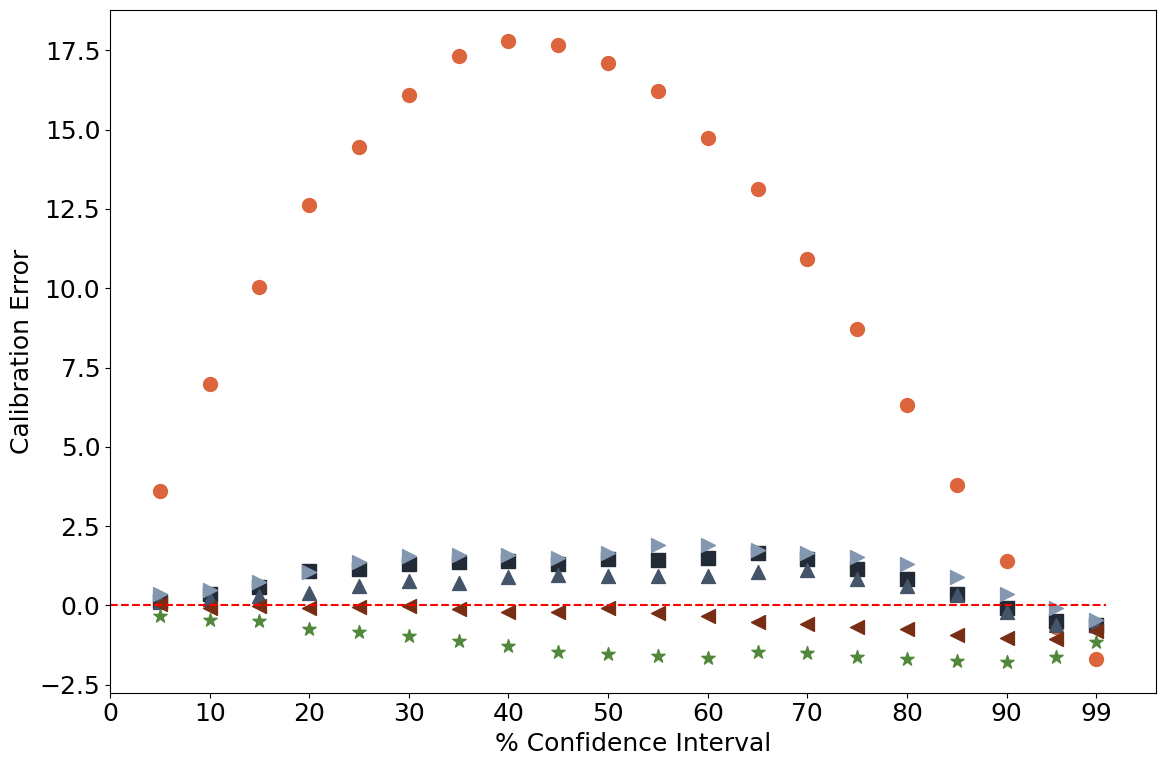

In [8]:
plot_calibration_errors(y_test_pred_list, y_test_std_list, y_test_list, bins=20, titles=titles) 

## Interactive QQ plot

In [9]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_PATH = "/content/drive/My Drive/Colab Notebooks/FYP/UK Wind Turbines"

df = pd.read_pickle(open(DATA_PATH + '/cleaned/full.pkl','rb'))

In [10]:
df = df[df['turbine'] == TURBINE_ID]
df = df.dropna(subset=FEATURES + [OUTPUT_FEATURE] + [DATETIME_COL])
df.reset_index(drop=True, inplace=True)


In [11]:
X_live, y_live = get_live_data(df, start_index=-144)

In [12]:
model = create_model_mlp_gaussian_large(X_live, 42)
model.summary()

model.load_weights('saved_models/mlp_large_finetuned.weights.h5')
evaluation = model.evaluate(X_live, y_live)
print("Evaluation Loss:", evaluation)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 300)               10500     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                            

ValueError: Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['dense/kernel:0', 'dense/bias:0']

In [ ]:
y_live_pred = np.array(model(X_live).mean()).ravel()
y_live_stddevs = np.array(model(X_live).stddev()).ravel()

evaluate_and_save_metrics(None,
    y_live, y_live, y_live_pred, y_live_pred,
    y_live_stddevs, y_live_stddevs, 0.99)

/cs/student/projects1/2020/ffiocchi/ucl/fyp/fyp/utils.py:446: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_existing = pd.read_csv(filename)


Train RMSE: 22.392
Test RMSE: 22.392
Train MAE: 11.992
Test MAE: 11.992
Percentage of Test Data Points within 99.00% CI: 98.56%
Percentage of Test Data Points within 99.00% CI: 98.56%
Percentage of Test Data Points within 99.00% CI: 94.76%
Percentage of Test Data Points within 99.00% CI: 94.76%


In [ ]:
t = 2850
dates = df.loc[t:t+143, DATETIME_COL]
X_live, y_live = get_live_data(df, t, t+143)
normalized_residuals = calculate_normalized_residuals(model, X_live, y_live)

In [ ]:
# qq_plot(normalized_residuals, 0.99)
interactive_qq_plot(df, model)

interactive(children=(IntText(value=230, description='Start Index:'), IntText(value=374, description='End Inde…

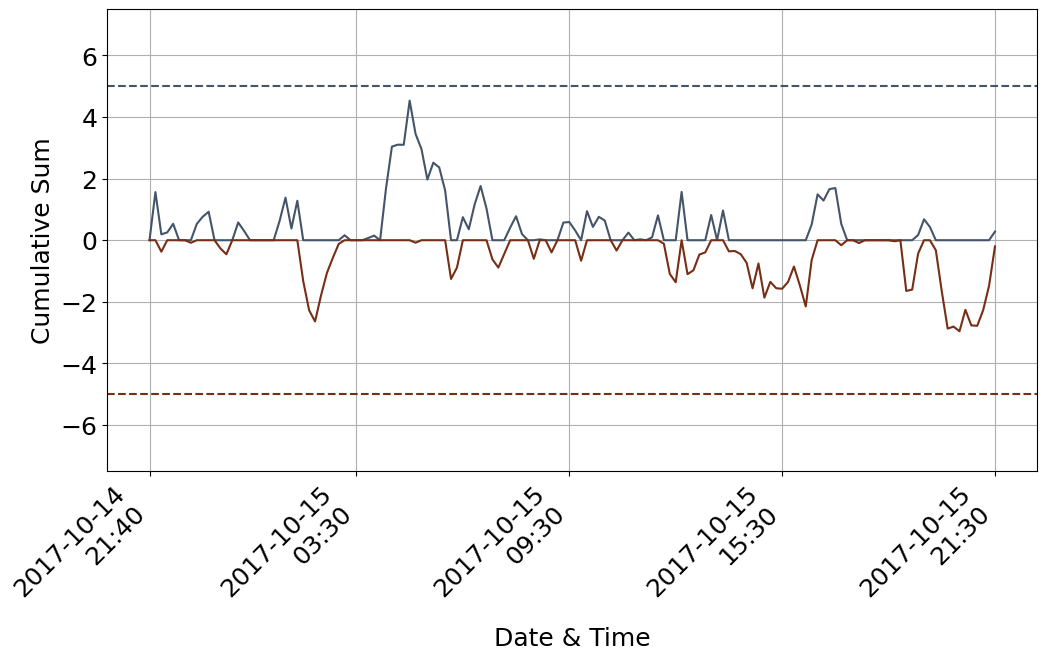

In [ ]:
cusum_test_plot(normalized_residuals, pd.to_datetime(dates))

In [ ]:
df = pd.read_pickle(DATA_PATH + '/unfiltered/full.pkl')
df = df[df['turbine'] == TURBINE_ID]

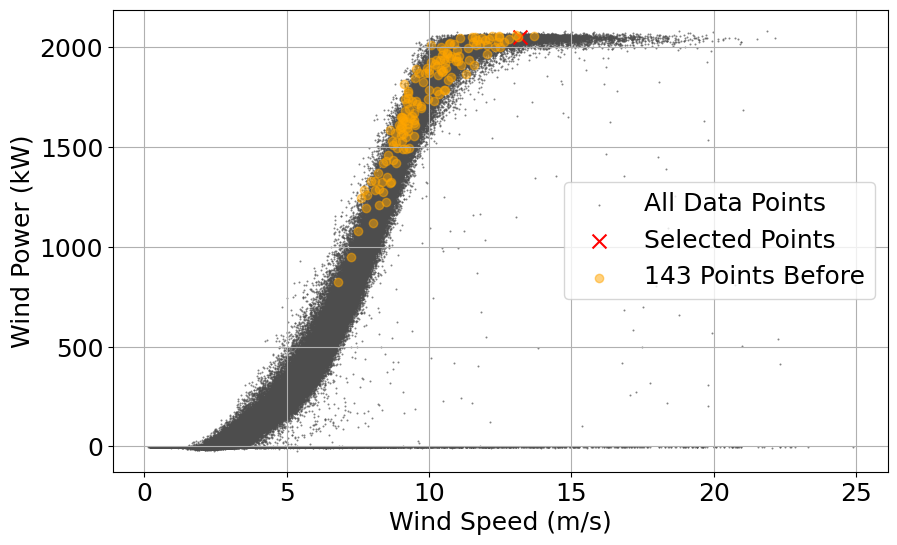

Indices of the red data points:
1262657    2018-01-16 10:50:00
1262658    2018-01-16 11:00:00
1262659    2018-01-16 11:10:00
1262660    2018-01-16 11:20:00
1262661    2018-01-16 11:30:00
                  ...         
1262796    2018-01-17 10:00:00
1262797    2018-01-17 10:10:00
1262798    2018-01-17 10:20:00
1262799    2018-01-17 10:30:00
1262800    2018-01-17 10:40:00
Name: Date.time, Length: 144, dtype: object


In [ ]:
reference_date = pd.Timestamp('2018-01-18 04:22:23') # Where the fault is
reference_date = pd.Timestamp('2018-01-17 10:30:01') # Illustrative to show the fault is detected early
mask_fault = (pd.to_datetime(df[DATETIME_COL]) > reference_date) \
        & (pd.to_datetime(df[DATETIME_COL]) < reference_date + pd.Timedelta(minutes=10))

mask_period = (pd.to_datetime(df[DATETIME_COL]) > reference_date - pd.Timedelta(minutes=10*143)) \
        & (pd.to_datetime(df[DATETIME_COL]) < reference_date)
unhealthy_indices = detect_visible_faults(df, mask_fault, mask_period)

print("Indices of the red data points:")
print(unhealthy_indices['Date.time'])


In [ ]:
df_unhealthy = df.loc[unhealthy_indices.index]
df_unhealthy.dropna(subset=FEATURES + [OUTPUT_FEATURE], inplace=True)
display(df_unhealthy)

,Date.time,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,Wind.speed.max,...,Blade.ang.pitch.pos.C.sd,Blade.ang.pitch.pos.C.min,Blade.ang.pitch.pos.C.max,Gear.oil.inlet.press.me,Gear.oil.pump.press.me,Drive.train.acceleration.me,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year
1262657,2018-01-16 10:50:00,1909.519165,266.490570,1067.984253,2119.685547,1853.582153,10.285767,1.399522,7.726889,13.115211,...,NaN,NaN,NaN,226.893265,795.190979,156.583923,70.482315,52.208694,5,2018
1262658,2018-01-16 11:00:00,1531.671265,339.942139,906.857117,2068.765137,1251.293430,8.687610,1.190002,6.108610,11.745298,...,NaN,NaN,NaN,228.085449,799.009094,164.654846,84.512482,43.793907,5,2018
1262659,2018-01-16 11:10:00,1493.141602,407.602753,848.232422,2088.196289,1460.726662,9.204111,1.512391,6.749016,12.210104,...,NaN,NaN,NaN,230.041809,802.393860,143.233276,80.764374,36.559395,5,2018
1262660,2018-01-16 11:20:00,1765.530762,373.574249,1006.307800,2103.306152,1865.873246,10.345723,1.634526,6.508446,13.134888,...,NaN,NaN,NaN,232.212860,804.139648,143.044678,77.111473,53.886345,5,2018
1262661,2018-01-16 11:30:00,1629.931152,376.086273,882.474609,2097.789307,1442.771912,9.161362,2.270015,5.262903,15.419560,...,NaN,NaN,NaN,234.190735,807.364014,160.123474,95.147873,50.728996,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262796,2018-01-17 10:00:00,1973.789185,152.976486,1549.306152,2144.185303,1923.664589,10.627632,1.919650,6.680706,13.927506,...,NaN,NaN,NaN,242.623337,818.533447,233.444901,119.074821,67.491516,5,2018
1262797,2018-01-17 10:10:00,2000.796631,113.905174,1784.455811,2127.571289,2043.098030,12.309803,1.785712,8.483497,15.473763,...,NaN,NaN,NaN,230.348663,801.587891,232.297302,100.934349,91.240997,5,2018
1262798,2018-01-17 10:20:00,2028.393677,97.462814,1660.814697,2111.287842,2046.351480,12.635148,2.144678,8.144174,17.175201,...,NaN,NaN,NaN,228.531631,798.646057,237.499863,111.364716,81.603806,5,2018
1262799,2018-01-17 10:30:00,2029.708252,85.147636,1713.826538,2091.867188,2044.393139,12.439314,2.274802,8.510969,17.109491,...,NaN,NaN,NaN,225.893951,793.627075,227.522415,87.006714,90.547462,5,2018


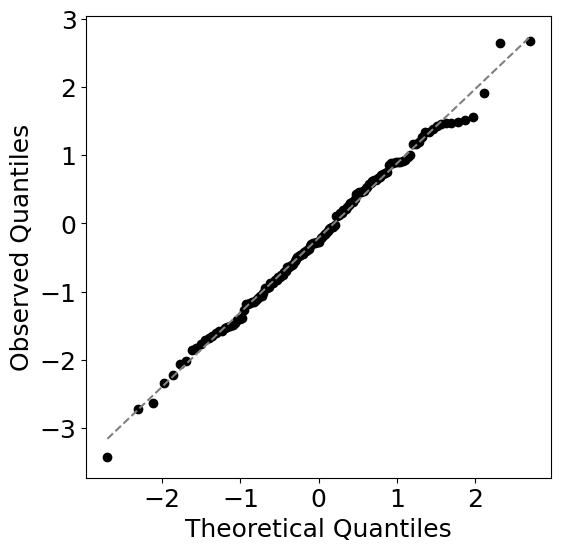

In [ ]:
X_unhealthy, y_unhealthy = get_live_data(df_unhealthy, 0)
normalized_residuals = calculate_normalized_residuals(model, X_unhealthy, y_unhealthy)

qq_plot(normalized_residuals ,0.99)

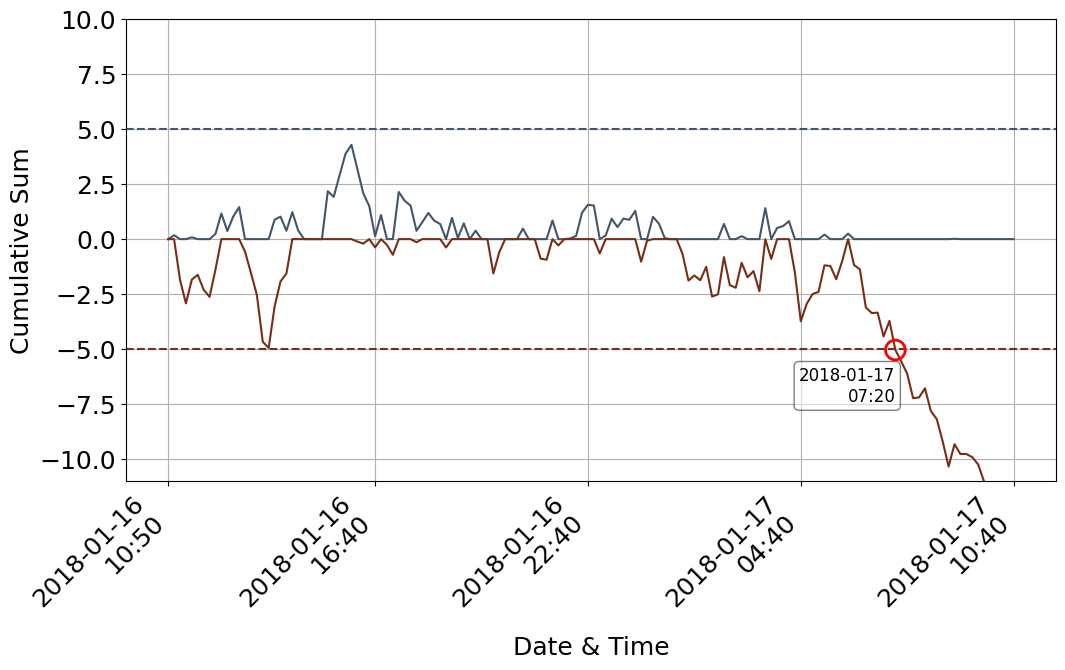

In [ ]:
cusum_test_plot(normalized_residuals, pd.to_datetime(df_unhealthy[DATETIME_COL]))